Customer segmentation using clustering

## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique (K-Means)

### Import Required packages

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Wrangling

In [14]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

replace Online_Retail_Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Online_Retail_Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yy


## Load the data

In [15]:
# YOUR CODE HERE
df_train = pd.read_csv("/content/Online_Retail_Train.csv")
df_test = pd.read_csv("/content/Online_Retail_Test.csv")

In [16]:
print("The train dataset")
df_train.head()

The train dataset


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [17]:
print("The shape of train dataset")
df_train.shape

The shape of train dataset


(514813, 8)

In [18]:
print("The information of train dataset")
df_train.info()

The information of train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


**Description, UnitpPrice, CustomerID and Country features have missing values.**

In [19]:
print("The statistical description of train dataset:")
df_train.describe()

The statistical description of train dataset:


,Quantity,UnitPrice,CustomerID
count,514813.000000,514813.000000,386550.000000
mean,9.552498,4.586406,15288.936753
std,223.529242,95.660226,1713.565852
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


1. **The mean value of UnitPrice feature is deviated as previous table too show it has more of missing values.**
2. **From above Minimum amount is in negative values but amount need not be negative, it must be greater than zero. So,we need to remove this redundancyas it leads to misclassification of data.**

In [20]:
print("The test dataset")
df_test.head()

The test dataset


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [21]:
print("The shape of test dataset")
df_test.shape

The shape of test dataset


(27096, 8)

In [22]:
print("The information of train dataset")
df_test.info()

The information of train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27096 entries, 0 to 27095
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    27096 non-null  object 
 1   StockCode    27096 non-null  object 
 2   Description  27027 non-null  object 
 3   Quantity     27096 non-null  int64  
 4   InvoiceDate  27096 non-null  object 
 5   UnitPrice    27096 non-null  float64
 6   CustomerID   20279 non-null  float64
 7   Country      27096 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.7+ MB


**just like in train dataset, test dataset too have Description, UnitpPrice, CustomerID and Country features have missing values.**


In [23]:
print("The statistical description of test dataset:")
df_test.describe()

The statistical description of test dataset:


,Quantity,UnitPrice,CustomerID
count,27096.000000,27096.000000,20279.000000
mean,9.547535,5.080545,15263.936338
std,42.986573,115.684282,1714.125912
min,-2376.000000,0.000000,12347.000000
25%,1.000000,1.250000,13924.000000
50%,3.000000,2.100000,15079.000000
75%,10.000000,4.130000,16768.500000
max,2880.000000,13541.330000,18287.000000


1. **The mean value of UnitPrice feature is deviated as previous table too show it has more of missing values.**


In [24]:
print("The uniquie values")
df_test.value_counts()

The uniquie values


InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
555524     22697      GREEN REGENCY TEACUP AND SAUCER      1         2011-06-05 11:37:00  2.95       16923.0     United Kingdom    3
573385     22080      RIBBON REEL POLKADOTS                5         2011-10-30 14:21:00  1.65       13421.0     United Kingdom    2
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  12        2011-10-26 12:46:00  1.25       14102.0     United Kingdom    2
539317     22443      GROW YOUR OWN HERBS SET OF 3         1         2010-12-16 19:04:00  7.95       17392.0     United Kingdom    2
562584     47590A     BLUE HAPPY BIRTHDAY BUNTING          2         2011-08-07 14:16:00  5.45       13752.0     United Kingdom    2
                                                                                                                                  ..
569521     21915      RED  HARMONICA IN BOX                1         2011-

## Data Pre-processing 

In [25]:
def countDuplicates(df_train):
  duplicatevalues = df_train.duplicated(keep='first')
  duplicate_drop = df_train.drop_duplicates()
  return (duplicate_drop)
df_train = countDuplicates(df_train)

In [26]:
print("Rows with duplicate removed:\n", df_train)

Rows with duplicate removed:
        InvoiceNo StockCode  ... CustomerID         Country
0         579427     22636  ...    16479.0  United Kingdom
1         554092     21916  ...    17176.0  United Kingdom
2         577774     84692  ...    16712.0  United Kingdom
3        C571196     23350  ...        NaN  United Kingdom
4         546649    84509a  ...        NaN  United Kingdom
...          ...       ...  ...        ...             ...
514807    540977     22208  ...        NaN  United Kingdom
514808    545682     22975  ...    14701.0  United Kingdom
514809    559691     22089  ...    13089.0  United Kingdom
514810    568716     22150  ...        NaN  United Kingdom
514812    546837    85014B  ...    13650.0  United Kingdom

[510059 rows x 8 columns]


In [27]:
def countNulls(df_train):
  return df_train.isnull().sum()

In [28]:
print("The total null values in each columns:\n", countNulls(df_train))

The total null values in each columns:
 InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128222
Country             0
dtype: int64


In [29]:
 df_train = df_train.dropna( subset = ['CustomerID', 'Description'])
 df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium
...,...,...,...,...,...,...,...,...
514803,551891,21402,RED EGG SPOON,24,2011-05-05 09:53:00,0.12,17429.0,United Kingdom
514806,548156,22652,TRAVEL SEWING KIT,2,2011-03-29 13:22:00,1.65,14871.0,United Kingdom
514808,545682,22975,SPACEBOY CHILDRENS EGG CUP,3,2011-03-06 11:39:00,1.25,14701.0,United Kingdom
514809,559691,22089,PAPER BUNTING VINTAGE PAISLEY,12,2011-07-11 15:52:00,2.95,13089.0,United Kingdom


In [30]:
index = df_train.InvoiceNo[df_train.InvoiceNo.str.contains('C') == True].index
df_train.drop(index = index, inplace = True) 
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium
...,...,...,...,...,...,...,...,...
514803,551891,21402,RED EGG SPOON,24,2011-05-05 09:53:00,0.12,17429.0,United Kingdom
514806,548156,22652,TRAVEL SEWING KIT,2,2011-03-29 13:22:00,1.65,14871.0,United Kingdom
514808,545682,22975,SPACEBOY CHILDRENS EGG CUP,3,2011-03-06 11:39:00,1.25,14701.0,United Kingdom
514809,559691,22089,PAPER BUNTING VINTAGE PAISLEY,12,2011-07-11 15:52:00,2.95,13089.0,United Kingdom


In [31]:
df_train.drop(df_train[df_train['StockCode'] == ('POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES')].index, axis=0)
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium
...,...,...,...,...,...,...,...,...
514803,551891,21402,RED EGG SPOON,24,2011-05-05 09:53:00,0.12,17429.0,United Kingdom
514806,548156,22652,TRAVEL SEWING KIT,2,2011-03-29 13:22:00,1.65,14871.0,United Kingdom
514808,545682,22975,SPACEBOY CHILDRENS EGG CUP,3,2011-03-06 11:39:00,1.25,14701.0,United Kingdom
514809,559691,22089,PAPER BUNTING VINTAGE PAISLEY,12,2011-07-11 15:52:00,2.95,13089.0,United Kingdom


In [32]:
redundant = ['POST','PADS','M', 'DOT','C2','BANK CHARGES']
df_train[~df_train['StockCode'].isin(redundant)]
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium
...,...,...,...,...,...,...,...,...
514803,551891,21402,RED EGG SPOON,24,2011-05-05 09:53:00,0.12,17429.0,United Kingdom
514806,548156,22652,TRAVEL SEWING KIT,2,2011-03-29 13:22:00,1.65,14871.0,United Kingdom
514808,545682,22975,SPACEBOY CHILDRENS EGG CUP,3,2011-03-06 11:39:00,1.25,14701.0,United Kingdom
514809,559691,22089,PAPER BUNTING VINTAGE PAISLEY,12,2011-07-11 15:52:00,2.95,13089.0,United Kingdom


In [33]:
def nullremove(df_train):
  df_train = df_train.dropna( subset = ['CustomerID', 'Description'])
  index = df_train.InvoiceNo[df_train.InvoiceNo.str.contains('C') == True].index
  df_train.drop(index = index)
  df_train.drop(df_train[df_train['StockCode'] == ('POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES')].index, axis=0)
  return df_train
#train_df = nullremove(df_train)
#print("The data after removing null:\n", train_df)

In [34]:
print("The shape of train dataset after cleanining")
df_train.shape

The shape of train dataset after cleanining


(373434, 8)

In [35]:
df_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
df_train.describe()

,Quantity,UnitPrice,CustomerID
count,373434.000000,373434.000000,373434.000000
mean,13.168659,3.129694,15289.375686
std,185.961970,22.688439,1713.551779
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13956.000000
50%,6.000000,1.950000,15152.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,8142.750000,18287.000000


In [37]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df_train, "Quantity")
replace_with_thresholds(df_train, "UnitPrice")
df_train.describe()

,Quantity,UnitPrice,CustomerID
count,373434.000000,373434.000000,373434.000000
mean,8.388711,2.601282,15289.375686
std,8.107194,2.105865,1713.551779
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13956.000000
50%,6.000000,1.950000,15152.000000
75%,12.000000,3.750000,16794.000000
max,27.000000,7.500000,18287.000000


In [38]:
#Create a DayOfWeek column using InvoiceDate
df_train["DateofWeek"] = pd.to_datetime(df_train.InvoiceDate)
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DateofWeek
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2.0,2011-11-29 13:04:00,7.50,16479.0,United Kingdom,2011-11-29 13:04:00
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24.0,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,2011-05-22 12:41:00
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6.0,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,2011-11-21 15:57:00
5,579668,23575,SNACK TRAY PAISLEY PARK,8.0,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,2011-11-30 12:32:00
7,547684,23176,ABC TREASURE BOOK BOX,8.0,2011-03-24 14:46:00,2.25,12408.0,Belgium,2011-03-24 14:46:00
...,...,...,...,...,...,...,...,...,...
514803,551891,21402,RED EGG SPOON,24.0,2011-05-05 09:53:00,0.12,17429.0,United Kingdom,2011-05-05 09:53:00
514806,548156,22652,TRAVEL SEWING KIT,2.0,2011-03-29 13:22:00,1.65,14871.0,United Kingdom,2011-03-29 13:22:00
514808,545682,22975,SPACEBOY CHILDRENS EGG CUP,3.0,2011-03-06 11:39:00,1.25,14701.0,United Kingdom,2011-03-06 11:39:00
514809,559691,22089,PAPER BUNTING VINTAGE PAISLEY,12.0,2011-07-11 15:52:00,2.95,13089.0,United Kingdom,2011-07-11 15:52:00


In [39]:
print("The shape of the train dataset after removing redundant data:")
df_train.shape

The shape of the train dataset after removing redundant data:


(373434, 9)

## Understanding new insights from the data 

In [40]:
df_train['month_of_date'] = df_train['DateofWeek'].dt.month
df_train['day'] = df_train['DateofWeek'].dt.day
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DateofWeek,month_of_date,day
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2.0,2011-11-29 13:04:00,7.50,16479.0,United Kingdom,2011-11-29 13:04:00,11,29
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24.0,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,2011-05-22 12:41:00,5,22
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6.0,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,2011-11-21 15:57:00,11,21
5,579668,23575,SNACK TRAY PAISLEY PARK,8.0,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,2011-11-30 12:32:00,11,30
7,547684,23176,ABC TREASURE BOOK BOX,8.0,2011-03-24 14:46:00,2.25,12408.0,Belgium,2011-03-24 14:46:00,3,24
...,...,...,...,...,...,...,...,...,...,...,...
514803,551891,21402,RED EGG SPOON,24.0,2011-05-05 09:53:00,0.12,17429.0,United Kingdom,2011-05-05 09:53:00,5,5
514806,548156,22652,TRAVEL SEWING KIT,2.0,2011-03-29 13:22:00,1.65,14871.0,United Kingdom,2011-03-29 13:22:00,3,29
514808,545682,22975,SPACEBOY CHILDRENS EGG CUP,3.0,2011-03-06 11:39:00,1.25,14701.0,United Kingdom,2011-03-06 11:39:00,3,6
514809,559691,22089,PAPER BUNTING VINTAGE PAISLEY,12.0,2011-07-11 15:52:00,2.95,13089.0,United Kingdom,2011-07-11 15:52:00,7,11


In [42]:
cor = df_train

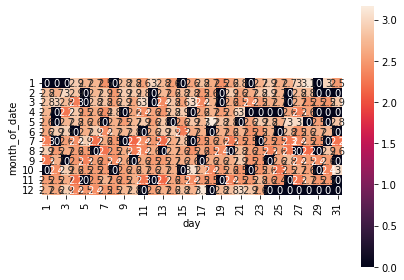

In [43]:
piv = pd.pivot_table(df_train, values="UnitPrice",index=["month_of_date"], columns=["day"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True, annot = True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(day_hour,annot=True,fmt="d",cmap="OrRd")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Heatmap of tranactions over the hour by day",size=10)

In [50]:
# YOUR CODE HERE
free_item = (df_train.UnitPrice == '0').value_counts()
print("The free items are:", free_item)

The free items are: False    373434
Name: UnitPrice, dtype: int64


In [51]:
df_train['Country'].value_counts().head(20)

United Kingdom     332170
Germany              8542
France               7896
EIRE                 6844
Spain                2352
Netherlands          2230
Belgium              1943
Switzerland          1757
Portugal             1377
Australia            1132
Norway               1023
Italy                 718
Channel Islands       710
Finland               655
Cyprus                574
Sweden                429
Austria               378
Denmark               362
Poland                316
Japan                 304
Name: Country, dtype: int64

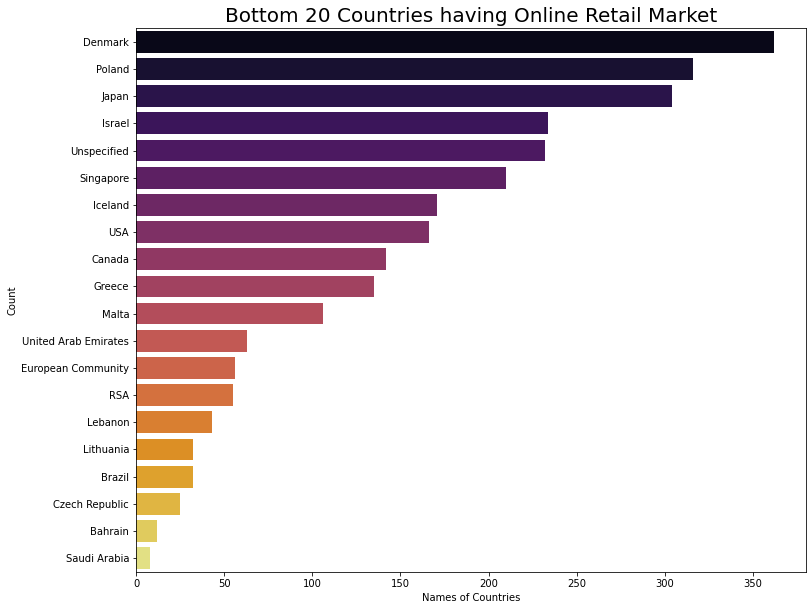

In [52]:
# checking the different values for country in the dataset

# checking the different values for country in the dataset

plt.rcParams['figure.figsize'] = (12, 10)
a = df_train['Country'].value_counts().tail(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

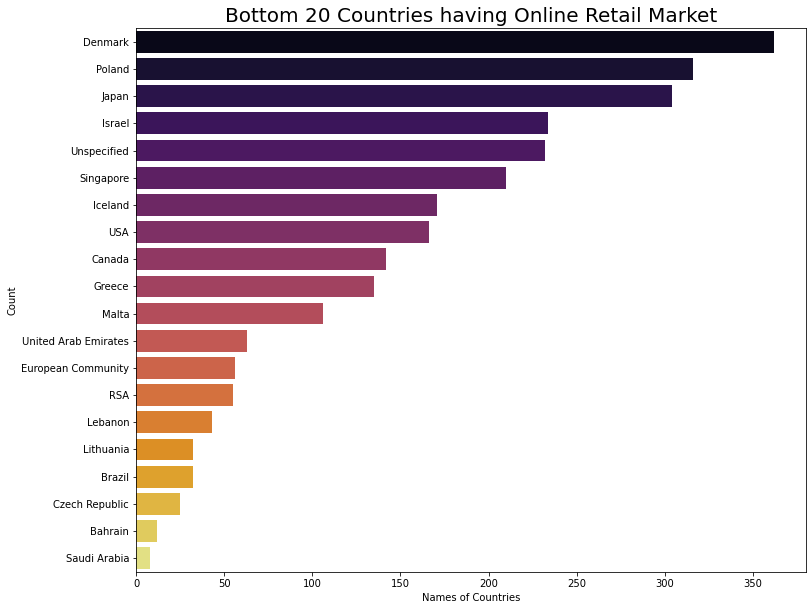

In [53]:
# checking the different values for country in the dataset

plt.rcParams['figure.figsize'] = (12, 10)
a = df_train['Country'].value_counts().tail(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

## Feature Engineering and Transformation

In [54]:
#LastDate in the inventory is calculated
LastDate = max(df_train.DateofWeek)
LastDate = LastDate + pd.DateOffset(days = 1)
#Difference between the Last date and the InvoiceDate of each row 
df_train["Diff"] = LastDate - df_train.DateofWeek

In [55]:
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DateofWeek,month_of_date,day,Diff
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2.0,2011-11-29 13:04:00,7.50,16479.0,United Kingdom,2011-11-29 13:04:00,11,29,10 days 23:46:00
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24.0,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,2011-05-22 12:41:00,5,22,202 days 00:09:00
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6.0,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,2011-11-21 15:57:00,11,21,18 days 20:53:00
5,579668,23575,SNACK TRAY PAISLEY PARK,8.0,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,2011-11-30 12:32:00,11,30,10 days 00:18:00
7,547684,23176,ABC TREASURE BOOK BOX,8.0,2011-03-24 14:46:00,2.25,12408.0,Belgium,2011-03-24 14:46:00,3,24,260 days 22:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
514803,551891,21402,RED EGG SPOON,24.0,2011-05-05 09:53:00,0.12,17429.0,United Kingdom,2011-05-05 09:53:00,5,5,219 days 02:57:00
514806,548156,22652,TRAVEL SEWING KIT,2.0,2011-03-29 13:22:00,1.65,14871.0,United Kingdom,2011-03-29 13:22:00,3,29,255 days 23:28:00
514808,545682,22975,SPACEBOY CHILDRENS EGG CUP,3.0,2011-03-06 11:39:00,1.25,14701.0,United Kingdom,2011-03-06 11:39:00,3,6,279 days 01:11:00
514809,559691,22089,PAPER BUNTING VINTAGE PAISLEY,12.0,2011-07-11 15:52:00,2.95,13089.0,United Kingdom,2011-07-11 15:52:00,7,11,151 days 20:58:00


In [56]:
def features(df_train):
  df_train["Total_Amount"] = df_train.Quantity*df_train.UnitPrice
  #Data is grouped by CustomerID and total amount of sale gives monetry
  monetry1 = df_train.groupby("CustomerID").Total_Amount.sum()
  monetry = monetry1.reset_index()
  #data is grouped by CustomerID and count of the InvoiceNo gives frequency
  frequency1 = df_train.groupby("CustomerID").InvoiceNo.count()
  frequency = frequency1.reset_index()
  #data is grouped byCustomerID and then Minimum diff gives recency
  recency1 = df_train.groupby("CustomerID").Diff.min()
  recency = recency1.reset_index()
  rmf = monetry.merge(frequency, on = "CustomerID")
  rmf = rmf.merge(recency, on = "CustomerID")
  rmf.columns = ["CustomerID", "MonetaryValue", "Frequency", "Recency"]
  return rmf

In [57]:
rfm = features(df_train)
rfm.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,28.08,1,326 days 02:49:00
1,12347.0,3659.24,171,2 days 20:58:00
2,12348.0,549.74,30,75 days 23:37:00
3,12349.0,1240.01,68,19 days 02:59:00
4,12350.0,301.90,17,310 days 20:49:00


In [58]:
rfm = rfm.drop(columns = ['CustomerID'], axis = 1)
rfm.Recency = rfm.Recency.dt.days
rfm.head()

,MonetaryValue,Frequency,Recency
0,28.08,1,326
1,3659.24,171,2
2,549.74,30,75
3,1240.01,68,19
4,301.90,17,310


In [59]:
rfm.describe()

,MonetaryValue,Frequency,Recency
count,4337.000000,4337.000000,4337.000000
mean,1305.489876,86.104220,92.486050
std,3325.319723,214.440056,100.002836
min,0.000000,1.000000,1.000000
25%,244.800000,16.000000,18.000000
50%,546.780000,39.000000,51.000000
75%,1336.220000,93.000000,142.000000
max,107218.920000,7318.000000,374.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

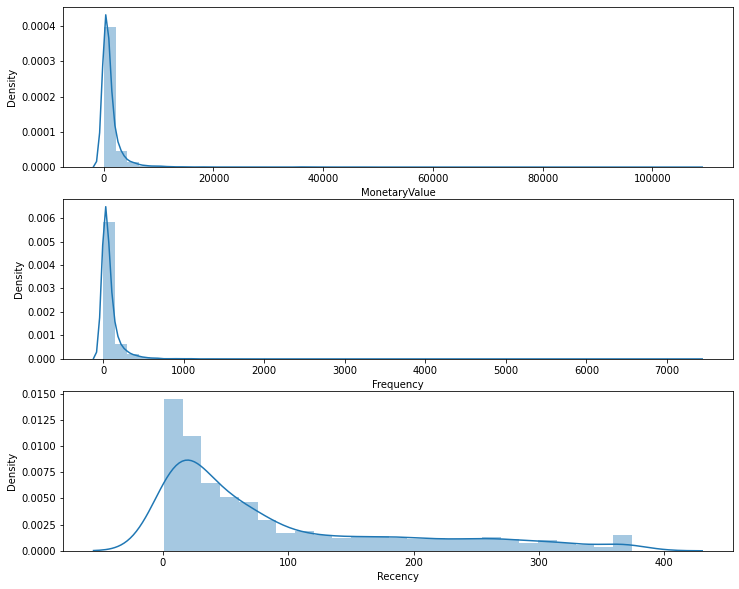

In [60]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm['MonetaryValue'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm['Recency'])

**The distribution of Recency is very skewed which, in this case, is actually good. We see that the majority of clients have bought something between 0 and 50 days ago.**

**From the above figure, all the variables do not have a symmetrical distribution. All of them are skewed to the right. To remove the skewness.**

In [61]:
#to determine outliers in data for all the columns
def viewDistribution(rfm):
    sns.boxplot(data = rfm)
    plt.xticks(rotation=90)
    plt.show

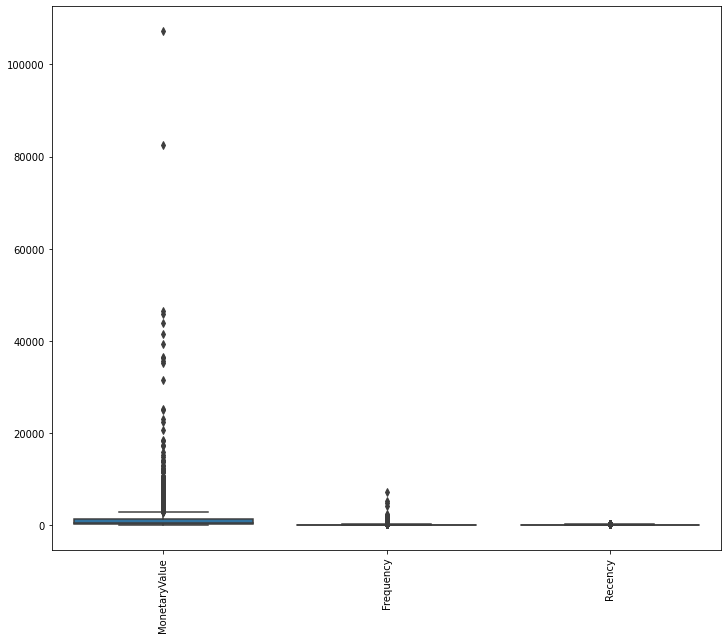

In [62]:
rfm_anomaly = rfm.iloc[:,0:4]
viewDistribution(rfm_anomaly)

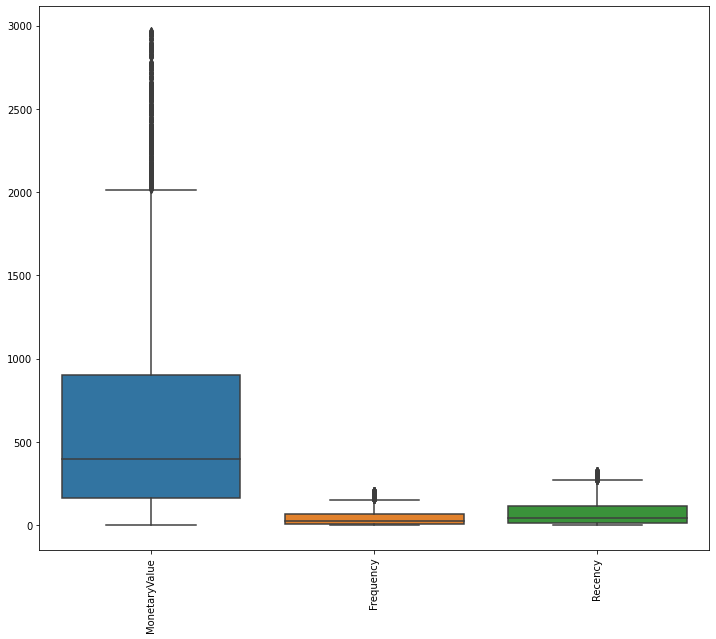

In [63]:
# UDF to remove outlier
def remove_outlier_IQR(rfm):
    Q1 = rfm.quantile(0.25)
    Q3 = rfm.quantile(0.75)
    IQR = Q3-Q1
    rfm1 = rfm[~((rfm < (Q1-1.5*IQR)) | (rfm >(Q3+1.5*IQR)))]
    return rfm1

# Removed the anomalies in all the columns
df_IQR = remove_outlier_IQR(rfm_anomaly)
df_IQR.fillna(0,inplace=True)
viewDistribution(df_IQR)

In [64]:
print("The final dataset after removing outliers")
df_IQR.head()

The final dataset after removing outliers


,MonetaryValue,Frequency,Recency
0,28.08,1.0,326.0
1,0.00,171.0,2.0
2,549.74,30.0,75.0
3,1240.01,68.0,19.0
4,301.90,17.0,310.0


In [65]:
df_IQR.describe()

,MonetaryValue,Frequency,Recency
count,4337.000000,4337.000000,4337.000000
mean,648.967501,46.228268,79.667051
std,675.630675,47.872741,87.184996
min,0.000000,0.000000,0.000000
25%,161.770000,10.000000,15.000000
50%,396.640000,29.000000,44.000000
75%,903.690000,68.000000,117.000000
max,2966.140000,208.000000,327.000000


### Scale the data
 
Apply `StandardScaler` on the features.

In [66]:
# YOUR CODE HERE for scaling
scaler = StandardScaler()
df = scaler.fit_transform(df_IQR)
df

array([[-0.91908067, -0.9448693 ,  2.82573108],
       [-0.96064663,  2.60662154, -0.89093319],
       [-0.14688342, -0.33902674, -0.05353661],
       ...,
       [-0.75716882, -0.73595807, -0.82210607],
       [ 1.89927795, -0.96576042, -0.86799082],
       [ 1.24840357,  0.45483591, -0.42061456]])

In [67]:
# Convert Data IN DataFrame
print("The shape of dataset:", df.shape )
df1 = pd.DataFrame(df, columns=["MonetaryValue", "Frequency", "Recency"])
df1.head(10)

The shape of dataset: (4337, 3)


,MonetaryValue,Frequency,Recency
0,-0.919081,-0.944869,2.825731
1,-0.960647,2.606622,-0.890933
2,-0.146883,-0.339027,-0.053537
3,0.874902,0.454836,-0.695923
4,-0.513753,-0.610611,2.642192
5,1.102020,0.789094,-0.500913
6,-0.917275,-0.923978,1.426246
7,0.462410,0.183251,1.747440
8,-0.609157,-0.756849,1.540958
9,1.950066,0.225034,-0.650038


## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [68]:
# YOUR CODE HERE to apply KMeans
#Training the data and fitting 
#Finding inertias for a range of k values
distortion = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df1)
    distortion.append(km.inertia_)

In [69]:
print("The inertia on fitted data:", km.inertia_) # Assign sum of squared distances to k element of dictionary

The inertia on fitted data: 1919.6586900754978


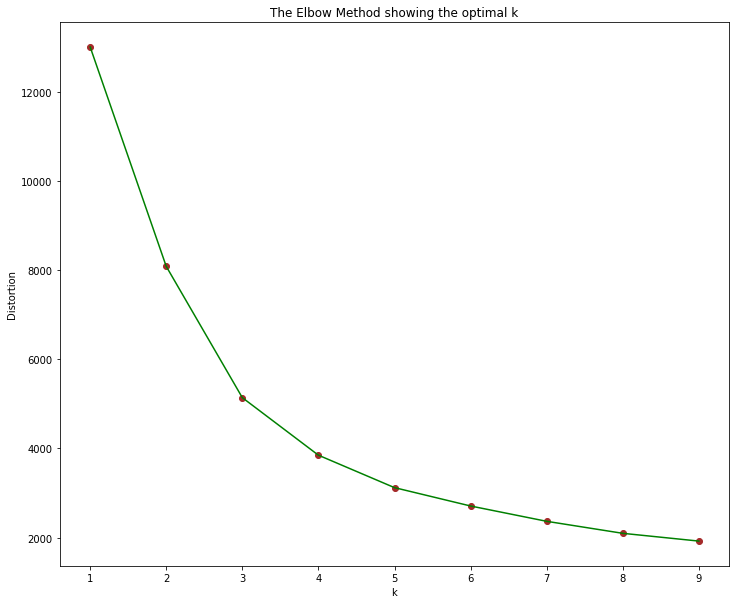

In [70]:
#Plotting the inertia's wrt 'k' values 
plt.plot(np.arange(1,10), distortion, color = "green")
plt.scatter(np.arange(1,10), distortion, color = "brown")
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


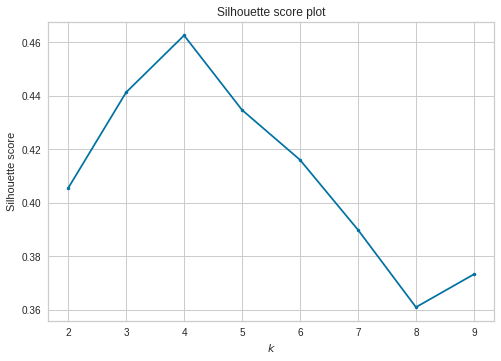

In [71]:
# YOUR CODE HERE
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# Plot Silhouette score plot

clusters = np.arange(2,10)
sil_score = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, random_state=1)
    kmeans.fit(df1)
    sil_score.append(silhouette_score(df1, kmeans.labels_))
plt.plot(clusters, sil_score, marker= '.')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

In [72]:
#Training with KMeans and predicting the ClusterID.
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(df1[['MonetaryValue', 'Frequency', 'Recency']])
pred = kmeans.predict(df1[['MonetaryValue', 'Frequency', 'Recency']])

In [73]:
model = kmeans

In [74]:
df1.head()

,MonetaryValue,Frequency,Recency
0,-0.919081,-0.944869,2.825731
1,-0.960647,2.606622,-0.890933
2,-0.146883,-0.339027,-0.053537
3,0.874902,0.454836,-0.695923
4,-0.513753,-0.610611,2.642192


In [75]:
frame = pd.DataFrame(df1)
frame['ClusterID'] = pred
frame['ClusterID'].value_counts()

0    1877
2     905
3     784
1     389
4     382
Name: ClusterID, dtype: int64

In [76]:
df1['Label'] = pred
df1.head()

,MonetaryValue,Frequency,Recency,ClusterID,Label
0,-0.919081,-0.944869,2.825731,2,2
1,-0.960647,2.606622,-0.890933,1,1
2,-0.146883,-0.339027,-0.053537,0,0
3,0.874902,0.454836,-0.695923,3,3
4,-0.513753,-0.610611,2.642192,2,2


In [77]:
kmeans.cluster_centers_

array([[-0.53773842, -0.54035131, -0.4403257 ],
       [-0.29328863,  1.91189773, -0.52084737],
       [-0.49380498, -0.49082787,  1.70591517],
       [ 0.92758718,  0.1146548 , -0.42798366],
       [ 2.21087637,  1.63737189, -0.46911185]])

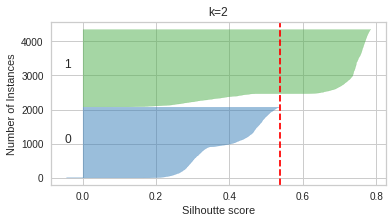

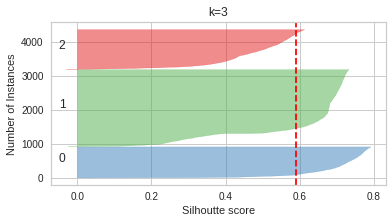

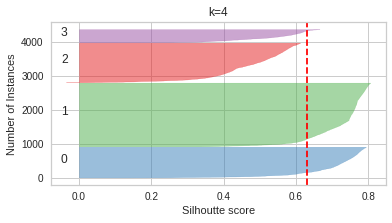

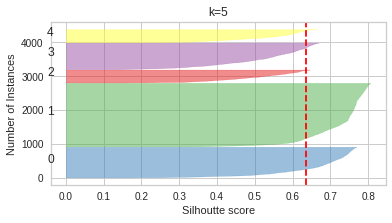

In [78]:
clusters = [2, 3, 4, 5]
for c in clusters:
    plt.figure(figsize=(6, 3))
    # Instantiate the clustering model and visualizer
    kmeans = KMeans(c, random_state=1)
    # Instantiate SilhouetteVisualizer()
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(df1);        
    plt.title("k={}".format(c))
    plt.xlabel("Silhoutte score")
    plt.ylabel("Number of Instances")
    plt.show()

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [79]:
# YOUR CODE HERE
# create an object
db = DBSCAN(eps=0.8, min_samples= 7, metric='euclidean')
# Convert Data IN DataFrame
print("The shape of dataset:", df.shape )
df2 = pd.DataFrame(df, columns=["MonetaryValue", "Frequency", "Recency"])

# fit the model
db.fit(df2)
# Cluster labled
print("Unique clusters in data: ", np.unique(db.labels_))

The shape of dataset: (4337, 3)
Unique clusters in data:  [-1  0]


In [80]:
from sklearn.metrics import silhouette_score

cluster_labels = db.labels_   

# silhouette score
silhouette_avg = silhouette_score(df2, cluster_labels)
print("The silhouette score is", format(silhouette_avg))

The silhouette score is 0.41032597968609796


In [81]:
df2['Label'] = db.labels_
df2.head()

,MonetaryValue,Frequency,Recency,Label
0,-0.919081,-0.944869,2.825731,0
1,-0.960647,2.606622,-0.890933,0
2,-0.146883,-0.339027,-0.053537,0
3,0.874902,0.454836,-0.695923,0
4,-0.513753,-0.610611,2.642192,0


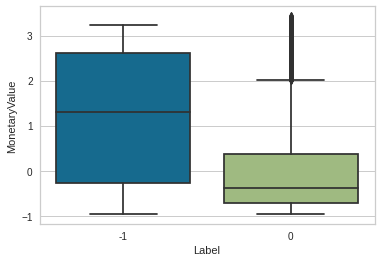

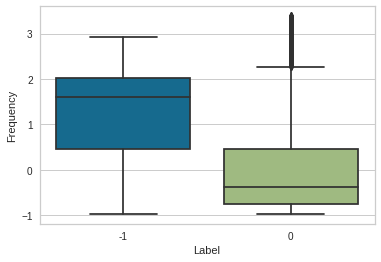

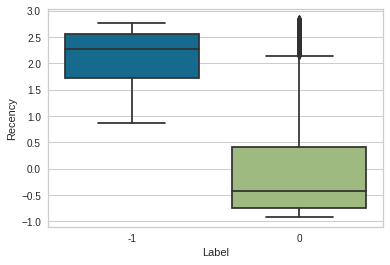

In [82]:
for c in df2.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(data = df2, y=c, x='Label')
    plt.show()

### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

**Plotting Clusters taking two features at a time**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


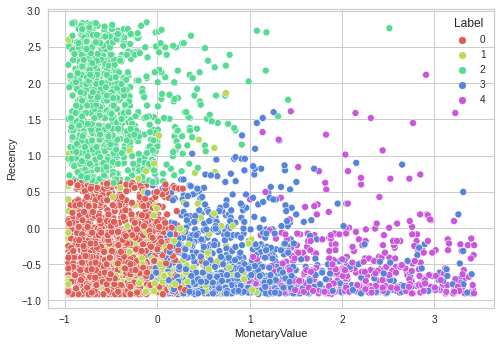

In [83]:
# YOUR CODE HERE
sns.scatterplot(df1['MonetaryValue'] ,df1['Recency'], hue = df1['Label'], palette = sns.color_palette('hls',5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


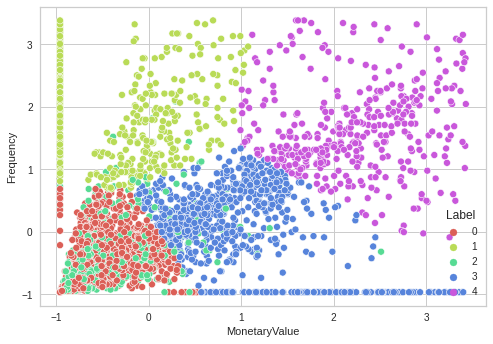

In [84]:
sns.scatterplot(df1['MonetaryValue'] ,df1['Frequency'] , hue = df1['Label'] , palette = sns.color_palette('hls',5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


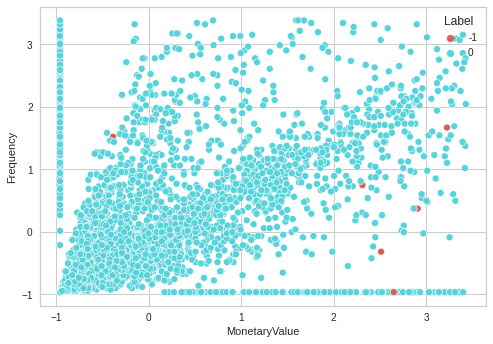

In [85]:
sns.scatterplot(df2['MonetaryValue'] ,df2['Frequency'] , hue = df2['Label'] , palette = sns.color_palette('hls',2))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


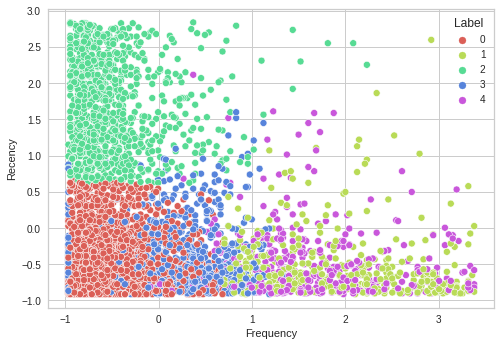

In [86]:
sns.scatterplot(df1['Frequency'] ,df1['Recency'] , hue = df1['Label'] , palette = sns.color_palette('hls',5))

**Plotting Clusters taking all features at a time**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


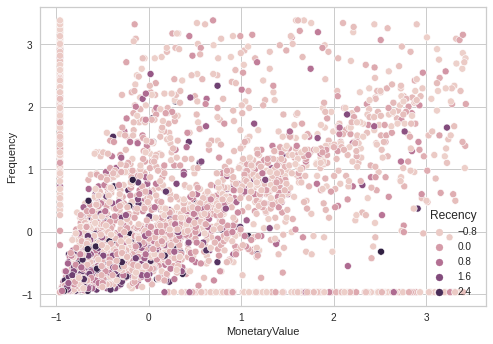

In [87]:
sns.scatterplot(df1['MonetaryValue'], df1['Frequency'], df1['Recency'], hue = df1['Label'])

In [88]:
MonetaryValue_mean = df1.groupby("ClusterID").MonetaryValue.mean()
Recency_mean = df1.groupby("ClusterID").Recency.mean()
Frequency_mean = df1.groupby("ClusterID").Frequency.mean()
print(MonetaryValue_mean,Recency_mean, Frequency_mean)

ClusterID
0   -0.538135
1   -0.293289
2   -0.493805
3    0.926669
4    2.210876
Name: MonetaryValue, dtype: float64 ClusterID
0   -0.440251
1   -0.520847
2    1.705915
3   -0.428179
4   -0.469112
Name: Recency, dtype: float64 ClusterID
0   -0.540514
1    1.911898
2   -0.490828
3    0.114209
4    1.637372
Name: Frequency, dtype: float64


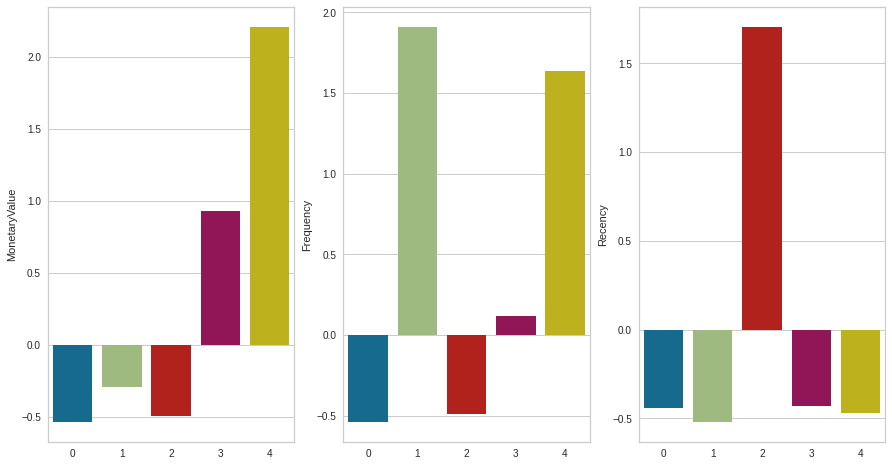

In [89]:
fig, axs = plt.subplots(1,3, figsize = (15, 8))
sns.barplot(x = [0,1,2,3,4],  y = MonetaryValue_mean , ax = axs[0])
sns.barplot(x = [0,1,2,3,4],  y = Frequency_mean , ax = axs[1])
sns.barplot(x = [0,1,2,3,4],  y = Recency_mean , ax = axs[2])

1. **Group 3, 4 are loyal customers.No need of any target marketing as their frequency,investing amount is more though recency is less.**
2. **Group 0,2 are useless customers as they just visit and dont spend money.**

Finally,Segmentation of customers is done using K-means Algorithm.

In [90]:
# Rank each metric R , F & M
df1['R_rank'] = df1['Recency'].rank( ascending=False)
df1['F_rank'] = df1['Frequency'].rank(ascending=True)
df1['M_rank'] = df1['MonetaryValue'].rank(ascending=True)
df1.head()
# normalize each rank with Max rank
df1['R_rank_norm']=(df1['R_rank']/df1['R_rank'].max())*100
df1['F_rank_norm']=(df1['F_rank']/df1['F_rank'].max())*100
df1['M_rank_norm']=(df1['F_rank']/df1['M_rank'].max())*100
df1.head()
# Now apply our equation and create final score **Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
df1['RFM_Score']=0.15*df1['R_rank_norm']+0.28*df1['F_rank_norm']+0.57*df1['M_rank_norm']
df1=df1.round(0)
df1.head()

,MonetaryValue,Frequency,Recency,ClusterID,Label,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,-1.0,-1.0,3.0,2,2,6.0,422.0,451.0,0.0,10.0,10.0,8.0
1,-1.0,3.0,-1.0,1,1,4046.0,4206.0,206.0,95.0,97.0,97.0,97.0
2,-0.0,-0.0,-0.0,0,0,1496.0,2234.0,2589.0,35.0,52.0,51.0,49.0
3,1.0,0.0,-1.0,3,3,3026.0,3260.0,3589.0,71.0,75.0,75.0,75.0
4,-1.0,-1.0,3.0,2,2,74.0,1520.0,1784.0,2.0,35.0,35.0,30.0


In [91]:
# ## Customer segments with RFM Model
# # Segment customers based on RFM score
# 0 - 50 - Low valued customer
# 50 - 75 - Medium valued customer
# 76 - 100 - High valued customer
df1["Customer_segment"]=np.where(df1['RFM_Score'] > 75 ,"High Value Customer",(np.where(df1['RFM_Score'] < 50 , "Low value Customer" ,"Medium Value Customer")))
df1.head()

,MonetaryValue,Frequency,Recency,ClusterID,Label,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,-1.0,-1.0,3.0,2,2,6.0,422.0,451.0,0.0,10.0,10.0,8.0,Low value Customer
1,-1.0,3.0,-1.0,1,1,4046.0,4206.0,206.0,95.0,97.0,97.0,97.0,High Value Customer
2,-0.0,-0.0,-0.0,0,0,1496.0,2234.0,2589.0,35.0,52.0,51.0,49.0,Low value Customer
3,1.0,0.0,-1.0,3,3,3026.0,3260.0,3589.0,71.0,75.0,75.0,75.0,Medium Value Customer
4,-1.0,-1.0,3.0,2,2,74.0,1520.0,1784.0,2.0,35.0,35.0,30.0,Low value Customer


### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels

* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [92]:
# YOUR CODE HERE
kmeans.labels_

array([0, 4, 1, ..., 1, 3, 3], dtype=int32)

In [93]:
df1

,MonetaryValue,Frequency,Recency,ClusterID,Label,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,-1.0,-1.0,3.0,2,2,6.0,422.0,451.0,0.0,10.0,10.0,8.0,Low value Customer
1,-1.0,3.0,-1.0,1,1,4046.0,4206.0,206.0,95.0,97.0,97.0,97.0,High Value Customer
2,-0.0,-0.0,-0.0,0,0,1496.0,2234.0,2589.0,35.0,52.0,51.0,49.0,Low value Customer
3,1.0,0.0,-1.0,3,3,3026.0,3260.0,3589.0,71.0,75.0,75.0,75.0,Medium Value Customer
4,-1.0,-1.0,3.0,2,2,74.0,1520.0,1784.0,2.0,35.0,35.0,30.0,Low value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,-1.0,-1.0,2.0,2,2,198.0,1046.0,1162.0,5.0,24.0,24.0,21.0,Low value Customer
4333,-1.0,-1.0,1.0,2,2,704.0,816.0,544.0,17.0,19.0,19.0,18.0,Low value Customer
4334,-1.0,-1.0,-1.0,0,0,3640.0,1124.0,937.0,85.0,26.0,26.0,35.0,Low value Customer
4335,2.0,-1.0,-1.0,3,3,3860.0,192.0,4016.0,91.0,4.0,4.0,17.0,Low value Customer


In [94]:
X = pd.DataFrame(df1, columns = ['MonetaryValue',	'Frequency',	'Recency'])
y = np.array(df1['Label'])
X, y

(      MonetaryValue  Frequency  Recency
 0              -1.0       -1.0      3.0
 1              -1.0        3.0     -1.0
 2              -0.0       -0.0     -0.0
 3               1.0        0.0     -1.0
 4              -1.0       -1.0      3.0
 ...             ...        ...      ...
 4332           -1.0       -1.0      2.0
 4333           -1.0       -1.0      1.0
 4334           -1.0       -1.0     -1.0
 4335            2.0       -1.0     -1.0
 4336            1.0        0.0     -0.0
 
 [4337 rows x 3 columns], array([2, 1, 0, ..., 0, 3, 3], dtype=int32))

In [95]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=0)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_clf = LogisticRegression(random_state=42, solver="saga", penalty="l2", class_weight="balanced", C=0.8, max_iter=500)
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_val)
print(log_clf.__class__.__name__, log_clf.score(X_train, y_train))
print(log_clf.__class__.__name__, log_clf.score(X_val, y_val))
print(log_clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.9011242432977803
LogisticRegression 0.9066820276497696
LogisticRegression 0.9066820276497696


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
dec_clf = tree.DecisionTreeClassifier(random_state=10)
#hyperparamters to tune
parameters = dict(max_depth=[10,12,14,18,20], criterion=['gini', 'entropy'])
gs_clf = GridSearchCV(dec_clf, parameters)
gs_clf.fit(X_train, y_train)
print('Best Criterion:', gs_clf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', gs_clf.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 10


In [98]:
dt_clf = tree.DecisionTreeClassifier(max_depth = 10, criterion = 'gini', random_state = 10)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_val)
print(dt_clf.__class__.__name__, accuracy_score(y_val, y_pred))

DecisionTreeClassifier 0.9101382488479263


In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 550,           # number of trees in the forest
                                #max_leaf_nodes=16,          # grow trees with max_leaf_nodes, selected by 
                                                            # relative reduction in impurity. 
                                                            # If None, then unlimited number of leaf nodes
                                random_state= 123, max_depth = 15, criterion = 'entropy', n_jobs = -1)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_val)
print(rf_clf.__class__.__name__, accuracy_score(y_val, y_pred))

RandomForestClassifier 0.9101382488479263


### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [100]:
# Test set provided as below
df_test = pd.read_csv("Online_Retail_Test.csv")
df_test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom


In [101]:
# YOUR CODE HERE
def countDuplicates(df_test):
  duplicatevalues = df_test.duplicated(keep='first')
  duplicate_drop = df_test.drop_duplicates()
  return (duplicate_drop)
df_test = countDuplicates(df_test)
print("Rows with duplicate removed:\n", df_test)
def countNulls(df_test):
  return df_test.isnull().sum()
print("The total null values in each columns:\n", countNulls(df_test))
def nullremove(df_test):
  df_test = df_test.dropna( subset = ['CustomerID', 'Description'])
  index = df_test.InvoiceNo[df_test.InvoiceNo.str.contains('C') == True].index
  df_test.drop(index = index)
  df_test.drop(df_test[df_test['StockCode'] == ('POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES')].index, axis=0)
  return df_test
print("The shape of train dataset after cleanining")
df_train.shape

Rows with duplicate removed:
       InvoiceNo StockCode  ... CustomerID         Country
0        555200     71459  ...    17315.0  United Kingdom
1        554974     21128  ...    14031.0  United Kingdom
2        550972     21086  ...    14031.0  United Kingdom
3        576652     22812  ...    17198.0  United Kingdom
4        546157     22180  ...    13502.0  United Kingdom
...         ...       ...  ...        ...             ...
27091    565234    15058B  ...        NaN  United Kingdom
27092    562955     22219  ...        NaN  United Kingdom
27093    548893    85131B  ...        NaN  United Kingdom
27094    579623     22952  ...    16062.0  United Kingdom
27095    552469     23208  ...    12867.0  United Kingdom

[27082 rows x 8 columns]
The total null values in each columns:
 InvoiceNo         0
StockCode         0
Description      69
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     6817
Country           0
dtype: int64
The shape of train dataset after cl

(373434, 13)

In [102]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df_test, "Quantity")
replace_with_thresholds(df_test, "UnitPrice")
df_test.describe()

,Quantity,UnitPrice,CustomerID
count,27082.00000,27082.000000,20265.000000
mean,6.08729,2.965268,15263.748038
std,21.62505,2.406662,1714.037864
min,-2376.00000,0.000000,12347.000000
25%,1.00000,1.250000,13924.000000
50%,3.00000,2.100000,15079.000000
75%,10.00000,4.130000,16768.000000
max,23.50000,8.450000,18287.000000


In [103]:
#Create a DayOfWeek column using InvoiceDate
df_test["DateofWeek"] = pd.to_datetime(df_test.InvoiceDate)
df_test

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DateofWeek
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,23.5,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,2011-06-01 12:05:00
1,554974,21128,GOLD FISHING GNOME,4.0,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,2011-05-27 17:14:00
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4.0,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2011-04-21 17:05:00
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3.0,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,2011-11-16 10:39:00
4,546157,22180,RETROSPOT LAMP,2.0,2011-03-10 08:40:00,8.45,13502.0,United Kingdom,2011-03-10 08:40:00
...,...,...,...,...,...,...,...,...,...
27091,565234,15058B,PINK POLKADOT GARDEN PARASOL,1.0,2011-09-02 09:38:00,8.45,NaN,United Kingdom,2011-09-02 09:38:00
27092,562955,22219,LOVEBIRD HANGING DECORATION WHITE,9.0,2011-08-11 10:14:00,1.63,NaN,United Kingdom,2011-08-11 10:14:00
27093,548893,85131B,BEADED CRYSTAL HEART GREEN ON STICK,1.0,2011-04-04 15:54:00,0.83,NaN,United Kingdom,2011-04-04 15:54:00
27094,579623,22952,60 CAKE CASES VINTAGE CHRISTMAS,23.5,2011-11-30 12:15:00,0.55,16062.0,United Kingdom,2011-11-30 12:15:00


In [104]:
print("The shape of the train dataset after removing redundant data:")
df_test.shape

The shape of the train dataset after removing redundant data:


(27082, 9)

In [105]:
#LastDate in the inventory is calculated
LastDate = max(df_test.DateofWeek)
LastDate = LastDate + pd.DateOffset(days = 1)
#Difference between the Last date and the InvoiceDate of each row 
df_test["Diff"] = LastDate - df_test.DateofWeek

In [106]:
df_test

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DateofWeek,Diff
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,23.5,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,2011-06-01 12:05:00,192 days 00:45:00
1,554974,21128,GOLD FISHING GNOME,4.0,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,2011-05-27 17:14:00,196 days 19:36:00
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4.0,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2011-04-21 17:05:00,232 days 19:45:00
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3.0,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,2011-11-16 10:39:00,24 days 02:11:00
4,546157,22180,RETROSPOT LAMP,2.0,2011-03-10 08:40:00,8.45,13502.0,United Kingdom,2011-03-10 08:40:00,275 days 04:10:00
...,...,...,...,...,...,...,...,...,...,...
27091,565234,15058B,PINK POLKADOT GARDEN PARASOL,1.0,2011-09-02 09:38:00,8.45,NaN,United Kingdom,2011-09-02 09:38:00,99 days 03:12:00
27092,562955,22219,LOVEBIRD HANGING DECORATION WHITE,9.0,2011-08-11 10:14:00,1.63,NaN,United Kingdom,2011-08-11 10:14:00,121 days 02:36:00
27093,548893,85131B,BEADED CRYSTAL HEART GREEN ON STICK,1.0,2011-04-04 15:54:00,0.83,NaN,United Kingdom,2011-04-04 15:54:00,249 days 20:56:00
27094,579623,22952,60 CAKE CASES VINTAGE CHRISTMAS,23.5,2011-11-30 12:15:00,0.55,16062.0,United Kingdom,2011-11-30 12:15:00,10 days 00:35:00


In [107]:
def features(df_test):
  df_test["Total_Amount"] = df_test.Quantity*df_test.UnitPrice
  #Data is grouped by CustomerID and total amount of sale gives monetry
  monetry1 = df_test.groupby("CustomerID").Total_Amount.sum()
  monetry = monetry1.reset_index()
  #data is grouped by CustomerID and count of the InvoiceNo gives frequency
  frequency1 = df_test.groupby("CustomerID").InvoiceNo.count()
  frequency = frequency1.reset_index()
  #data is grouped byCustomerID and then Minimum diff gives recency
  recency1 = df_test.groupby("CustomerID").Diff.min()
  recency = recency1.reset_index()
  rmf = monetry.merge(frequency, on = "CustomerID")
  rmf = rmf.merge(recency, on = "CustomerID")
  rmf.columns = ["CustomerID", "MonetaryValue", "Frequency", "Recency"]
  return rmf

In [108]:
rf = features(df_test)
rf = rf.drop(columns = ['CustomerID'], axis = 1)
rf.Recency = rf.Recency.dt.days
rf.head()

,MonetaryValue,Frequency,Recency
0,217.925,11,2
1,6.815,1,319
2,104.940,5,19
3,8.450,1,283
4,50.700,2,204


In [109]:
rf.describe()

,MonetaryValue,Frequency,Recency
count,3344.00000,3344.000000,3344.000000
mean,84.94784,6.060108,101.907596
std,195.63509,13.203224,101.734571
min,-925.87500,1.000000,1.000000
25%,17.40000,2.000000,23.000000
50%,41.05750,3.000000,61.000000
75%,94.53625,6.250000,161.000000
max,6186.56500,377.000000,374.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

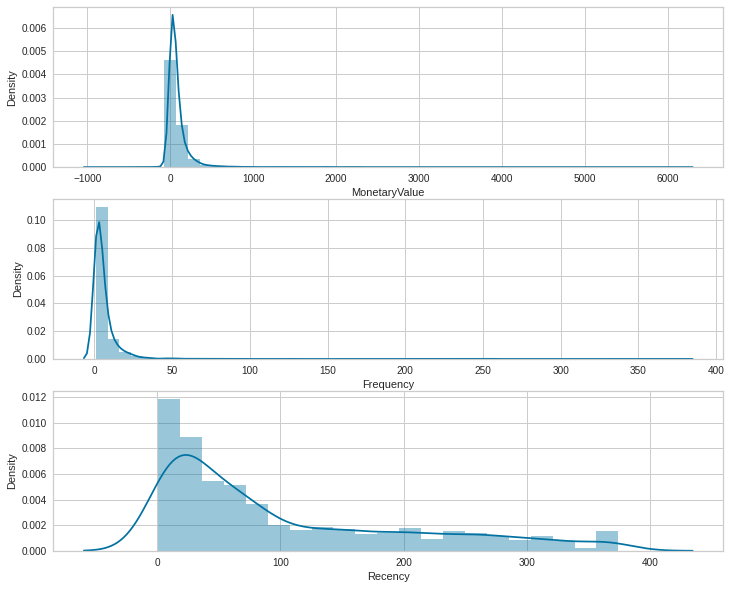

In [110]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rf['MonetaryValue'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rf['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rf['Recency'])

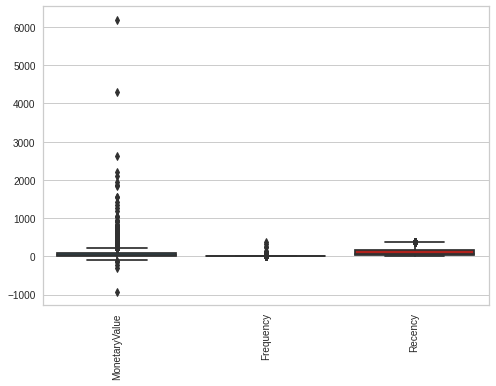

In [111]:
def viewDistribution(rfm):
    sns.boxplot(data = rfm)
    plt.xticks(rotation=90)
    plt.show

rfm_anomaly1 = rf.iloc[:,0:4]
viewDistribution(rfm_anomaly1)

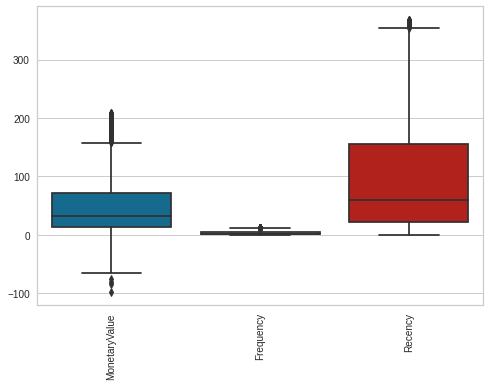

In [112]:
#to determine outliers in data for all the columns
def remove_outlier_IQR(rfm):
    Q1 = rfm.quantile(0.25)
    Q3 = rfm.quantile(0.75)
    IQR1= Q3-Q1
    rfm2 = rf[~((rf < (Q1-1.5*IQR1)) | (rf >(Q3+1.5*IQR1)))]
    return rfm2

# Removed the anomalies in all the columns
df_IQR1 = remove_outlier_IQR(rfm_anomaly1)
df_IQR1.fillna(0,inplace=True)
viewDistribution(df_IQR1)

In [113]:
print("The final dataset after removing outliers")
df_IQR1.head()

The final dataset after removing outliers


,MonetaryValue,Frequency,Recency
0,0.000,11.0,2.0
1,6.815,1.0,319.0
2,104.940,5.0,19.0
3,8.450,1.0,283.0
4,50.700,2.0,204.0


In [114]:
df_IQR1.describe()

,MonetaryValue,Frequency,Recency
count,3344.000000,3344.000000,3344.000000
mean,48.059313,3.264653,97.572667
std,48.239367,2.873480,97.995611
min,-97.525000,0.000000,0.000000
25%,13.337500,1.000000,22.000000
50%,31.630000,2.000000,60.000000
75%,71.550000,5.000000,155.000000
max,209.295000,12.000000,368.000000


In [115]:
# YOUR CODE HERE for scaling
#scaler = StandardScaler()
df_1  = scaler.transform(df_IQR1)
df_1

array([[-0.96064663, -0.73595807, -0.89093319],
       [-0.9505586 , -0.9448693 ,  2.74543278],
       [-0.80530718, -0.86130481, -0.69592303],
       ...,
       [-0.940663  , -0.9448693 ,  0.53149388],
       [-0.79891241, -0.96576042, -0.86799082],
       [-0.91934712, -0.92397818, -0.23707559]])

In [116]:
# Convert Data IN DataFrame
print("The shape of dataset:", df_1.shape )
df_df = pd.DataFrame(df, columns=["MonetaryValue", "Frequency", "Recency"])
df_df.head(10)

The shape of dataset: (3344, 3)


,MonetaryValue,Frequency,Recency
0,-0.919081,-0.944869,2.825731
1,-0.960647,2.606622,-0.890933
2,-0.146883,-0.339027,-0.053537
3,0.874902,0.454836,-0.695923
4,-0.513753,-0.610611,2.642192
5,1.102020,0.789094,-0.500913
6,-0.917275,-0.923978,1.426246
7,0.462410,0.183251,1.747440
8,-0.609157,-0.756849,1.540958
9,1.950066,0.225034,-0.650038


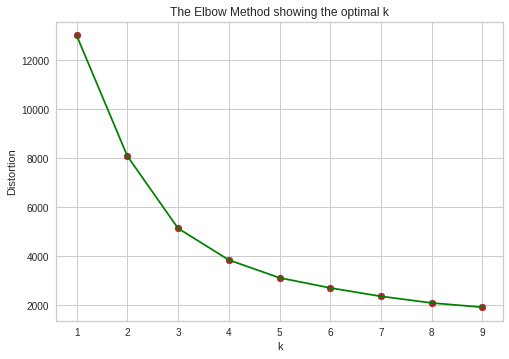

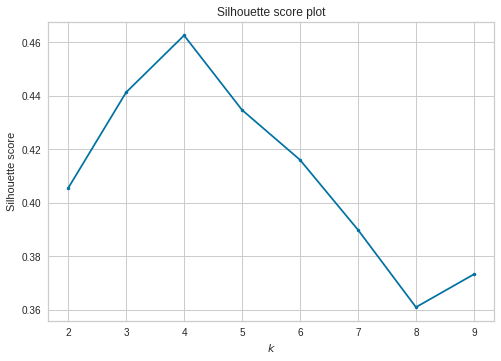

In [117]:
#Plotting the inertia's wrt 'k' values 
plt.plot(np.arange(1,10), distortion, color = "green")
plt.scatter(np.arange(1,10), distortion, color = "brown")
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

clusters = np.arange(2,10)
sil_score = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, random_state=1)
    kmeans.fit(df_df)
    sil_score.append(silhouette_score(df_df, kmeans.labels_))
plt.plot(clusters, sil_score, marker= '.')
plt.title('Silhouette score plot')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

In [118]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(df_df)
pred1 = kmeans.predict(df_df)
frame1 = pd.DataFrame(df_df)
frame1['ClusterID'] = pred1
frame1['ClusterID'].value_counts()
df_df['Label'] = pred1
df_df.head()

,MonetaryValue,Frequency,Recency,ClusterID,Label
0,-0.919081,-0.944869,2.825731,0,0
1,-0.960647,2.606622,-0.890933,1,1
2,-0.146883,-0.339027,-0.053537,2,2
3,0.874902,0.454836,-0.695923,3,3
4,-0.513753,-0.610611,2.642192,0,0


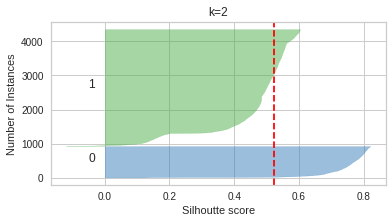

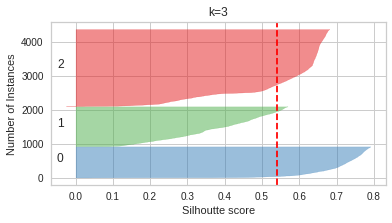

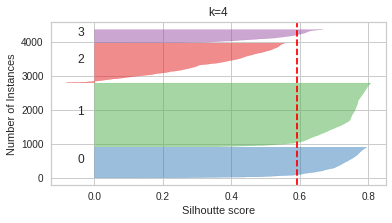

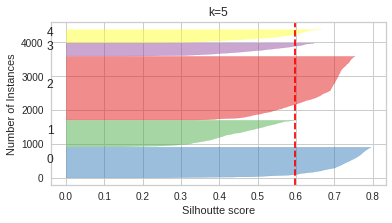

In [119]:
kmeans.cluster_centers_
clusters = [2, 3, 4, 5]
for c in clusters:
    plt.figure(figsize=(6, 3))
    # Instantiate the clustering model and visualizer
    kmeans = KMeans(c, random_state=1)
    # Instantiate SilhouetteVisualizer()
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    # Fit the data to the visualizer
    visualizer.fit(df_df);        
    plt.title("k={}".format(c))
    plt.xlabel("Silhoutte score")
    plt.ylabel("Number of Instances")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


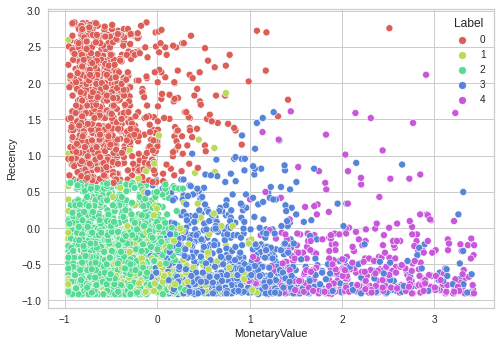

In [120]:
sns.scatterplot(df_df['MonetaryValue'] ,df_df['Recency'], hue = df_df['Label'], palette = sns.color_palette('hls',5))

In [121]:
X1 = pd.DataFrame(df_df, columns = ['MonetaryValue',	'Frequency',	'Recency'])
y1 = np.array(df1['Label'])
X, y

(      MonetaryValue  Frequency  Recency
 0              -1.0       -1.0      3.0
 1              -1.0        3.0     -1.0
 2              -0.0       -0.0     -0.0
 3               1.0        0.0     -1.0
 4              -1.0       -1.0      3.0
 ...             ...        ...      ...
 4332           -1.0       -1.0      2.0
 4333           -1.0       -1.0      1.0
 4334           -1.0       -1.0     -1.0
 4335            2.0       -1.0     -1.0
 4336            1.0        0.0     -0.0
 
 [4337 rows x 3 columns], array([2, 1, 0, ..., 0, 3, 3], dtype=int32))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state=0)
log_clf1 = LogisticRegression(random_state=42, solver="saga", penalty="l2", class_weight="balanced", C=0.8, max_iter=500)
log_clf1.fit(X_train, y_train)
y_pred1 = log_clf.predict(X_test)
print(log_clf.__class__.__name__, accuracy_score(y_test, y_pred1))
dec_clf = tree.DecisionTreeClassifier(random_state=10)
#hyperparamters to tune
parameters1 = dict(max_depth=[10,12,14,18,20], criterion=['gini', 'entropy'])
gs_clf = GridSearchCV(dec_clf, parameters1)
gs_clf.fit(X_train, y_train)
print('Best Criterion:', gs_clf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', gs_clf.best_estimator_.get_params()['max_depth'])
dt_clf1 = tree.DecisionTreeClassifier(max_depth = 12, criterion = 'entropy', random_state = 10)
dt_clf1.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(dt_clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9788018433179724
Best Criterion: entropy
Best max_depth: 12
DecisionTreeClassifier 0.9152073732718894


**Using the Training Data Best Model to Predic on Train Data**





In [123]:
df_test = pd.DataFrame(df_1, columns=["MonetaryValue", "Frequency", "Recency"])
df_test.head()

,MonetaryValue,Frequency,Recency
0,-0.960647,-0.735958,-0.890933
1,-0.950559,-0.944869,2.745433
2,-0.805307,-0.861305,-0.695923
3,-0.948138,-0.944869,2.332470
4,-0.885597,-0.923978,1.426246


In [124]:
df_test['Segment'] = model.predict(df_test)
df_test.head(10)

,MonetaryValue,Frequency,Recency,Segment
0,-0.960647,-0.735958,-0.890933,0
1,-0.950559,-0.944869,2.745433,2
2,-0.805307,-0.861305,-0.695923,0
3,-0.948138,-0.944869,2.332470,2
4,-0.885597,-0.923978,1.426246,2
5,-0.912020,-0.903087,1.747440,2
6,-0.850108,-0.903087,1.540958,2
7,-0.793709,-0.923978,2.825731,2
8,-0.960647,-0.840414,-0.535326,0
9,-0.753668,-0.944869,-0.890933,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


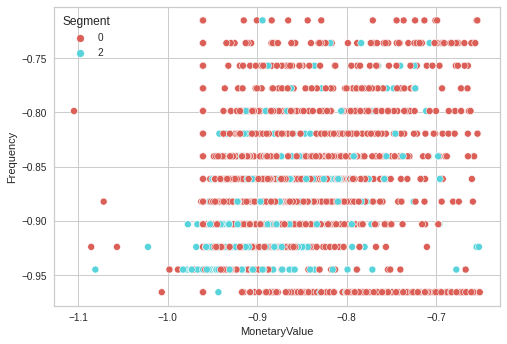

In [125]:
sns.scatterplot(df_test['MonetaryValue'] ,df_test['Frequency'] , hue = df_test['Segment'], palette = sns.color_palette('hls', 2))

In [126]:
 sns.scatterplot(df_test['Recency'] ,df_test['Frequency'] , hue = df_test['Segment'] , palette = sns.color_palette('hls2'))

ValueError: ignored

In [ ]:
 sns.scatterplot(df_test['Recency'] ,df_test['MonetaryValue'] , hue = df_test['Segment'], palette = sns.color_palette('hls',2))